In [36]:
print('Welcome to XGBoost Classifier')

Welcome to XGBoost Classifier


In [48]:
!pip install xgboost


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [50]:
!pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [104]:
df = pd.read_csv("./data/creditcard.csv")

In [159]:
subset = df.sample(n=100000, random_state=689)

In [160]:
subset.shape

(100000, 31)

In [161]:
subset["Class"].value_counts()

Class
0    99839
1      161
Name: count, dtype: int64

In [162]:
X = subset.drop("Class",axis=1)
y = subset["Class"]

In [176]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=subset["Class"], random_state=123)

In [177]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70000, 30), (70000,), (30000, 30), (30000,))

In [178]:
y_test.value_counts(), y_train.value_counts()

(Class
 0    29952
 1       48
 Name: count, dtype: int64,
 Class
 0    69887
 1      113
 Name: count, dtype: int64)

In [179]:
sm = SMOTE(sampling_strategy="minority", k_neighbors=1, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [180]:
X_train_res.shape, y_train_res.shape

((139774, 30), (139774,))

In [181]:
y_train_res.value_counts()

Class
0    69887
1    69887
Name: count, dtype: int64

In [182]:
y_train_res.sum()

np.int64(69887)

In [183]:
xgboost = XGBClassifier(n_estimatots = 100, 
                        max_depth=5, 
                        learning_rate=0.1, 
                        use_label_encoders=False,
                        eval_metrics='logloss', 
                        random_state=142)

In [184]:
xgboost.fit(X_train_res, y_train_res)

y_pred = xgboost.predict(X_test)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [06:29:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "n_estimatots", "use_label_encoders" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [185]:
print(f'Accuracy score {accuracy_score(y_test, y_pred)}')

Accuracy score 0.9991333333333333


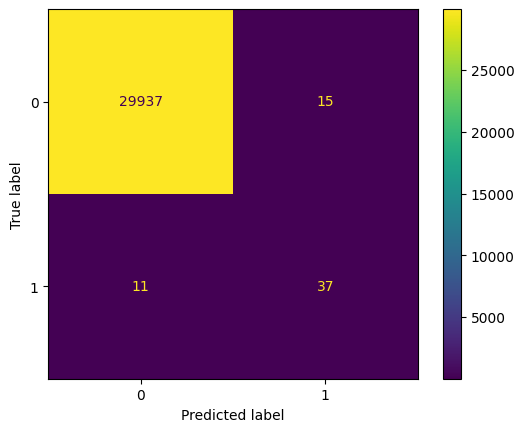

In [186]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format="d")